In [21]:
# Prueba de set 

import cv2 

# Establecer ruta de la imagen a probar 
img = cv2.imread('flores/flor5/eja0.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
# Importar librerías

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
# Librerias para red neuronal 

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [24]:
# Cargar set de imágenes 

import os
import re
import matplotlib.pyplot as plt

# Establecer nombre de la carpeta donde estan las subcarpetas de flores con sus imagenes
dirname = os.path.join(os.getcwd(),'flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\Flor1_AzucenaRosa 1
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\Flor2_RosalRojo 10723
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\Flor3_MargaritaNaranja 10017
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\flor4_RaizPlomoAzul 8578
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\Flor5_OjoCanario 8178
Directorios leidos: 5
Imagenes en cada directorio [10724, 10017, 8578, 8178, 9219]
suma Total de imagenes en subdirs: 46716


In [25]:
# Crear etiquetas 

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  46716


In [26]:
# nombres de clases
# Las clases se llamaran igual que las subcarpetas 

flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 Flor1_AzucenaRosa
1 Flor2_RosalRojo
2 Flor3_MargaritaNaranja
3 flor4_RaizPlomoAzul
4 Flor5_OjoCanario


In [27]:
# clases

y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [28]:
# SETS de entrenamiento y TESTs, ver cantidad y  tamaño de las imagenes 

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (37372, 26, 26, 3) (37372,)
Testing data shape :  (9344, 26, 26, 3) (9344,)


Text(0.5, 1.0, 'Ground Truth : 3')

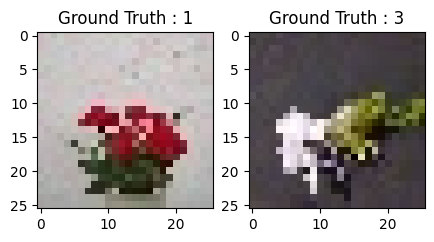

In [29]:
# Mostrar ejemplos 

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

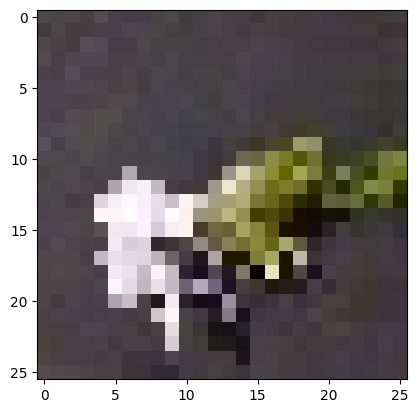

In [30]:
# Preprocesar imagenes 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [31]:
# ONE HOT encoding para red neuronal , dejar todo igual

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


In [32]:
#Mezclar todo y crear los grupos de entrenamiento y testing, dejar todo igual 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [33]:
#Ver tamaño y cantidad de datos 80 y 20

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(29897, 26, 26, 3) (7475, 26, 26, 3) (29897, 5) (7475, 5)


In [34]:
# Crear modelo de CNN 

#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [16]:
# colocar el nombre del modelo, en este caso es "flower_model"

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(26,26,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [17]:
#Dejar igual

flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                        

In [18]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [19]:
## Entrenar el modelo para clasificar imágenes, establecer nombre de entrenamiento, aqui es flower_Train

flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20


467/467 [==============================] - 9s 18ms/step - loss: 1.4992 - accuracy: 0.3261 - val_loss: 1.2999 - val_accuracy: 0.5869
Epoch 2/20
467/467 [==============================] - 8s 17ms/step - loss: 1.2895 - accuracy: 0.4772 - val_loss: 1.0437 - val_accuracy: 0.7279
Epoch 3/20
467/467 [==============================] - 9s 19ms/step - loss: 1.1082 - accuracy: 0.5829 - val_loss: 0.8634 - val_accuracy: 0.8107
Epoch 4/20
467/467 [==============================] - 9s 18ms/step - loss: 0.9681 - accuracy: 0.6503 - val_loss: 0.7295 - val_accuracy: 0.8426
Epoch 5/20
467/467 [==============================] - 8s 17ms/step - loss: 0.8625 - accuracy: 0.6979 - val_loss: 0.6344 - val_accuracy: 0.8552
Epoch 6/20
467/467 [==============================] - 9s 19ms/step - loss: 0.7704 - accuracy: 0.7365 - val_loss: 0.5507 - val_accuracy: 0.8746
Epoch 7/20
467/467 [==============================] - 8s 18ms/step - loss: 0.7012 - accuracy: 0.7660 - val_loss: 0.4824 - val_accuracy: 0.89

In [47]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
# EStablecer ruta donde queremos guardar

flower_model.save("trained/flores1.h5py")

In [30]:
# Evaluar la red naauronal 



test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

42/42 [==============================] - 0s 3ms/step - loss: 0.9132 - accuracy: 0.7427


In [31]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])




Test loss: 0.9132211804389954
Test accuracy: 0.7427075505256653


In [32]:
flower_train.history




{'loss': [1.6224547624588013,
  1.5614006519317627,
  1.5372133255004883,
  1.5091606378555298,
  1.488348126411438,
  1.4796068668365479,
  1.4482358694076538,
  1.4243782758712769,
  1.3855127096176147,
  1.3655452728271484,
  1.3396373987197876,
  1.3149598836898804,
  1.2875360250473022,
  1.2661163806915283,
  1.2398594617843628,
  1.2076289653778076,
  1.1679471731185913,
  1.14763343334198,
  1.1169005632400513,
  1.0938080549240112],
 'accuracy': [0.21089549362659454,
  0.3027823269367218,
  0.33037176728248596,
  0.3549216687679291,
  0.3581950068473816,
  0.3752630352973938,
  0.38461539149284363,
  0.4061257839202881,
  0.4264671504497528,
  0.43768996000289917,
  0.4566284716129303,
  0.47743746638298035,
  0.4825812578201294,
  0.5040916800498962,
  0.5148468613624573,
  0.5426700711250305,
  0.555061936378479,
  0.5697919130325317,
  0.5891980528831482,
  0.5938742160797119],
 'val_loss': [1.5425246953964233,
  1.500982403755188,
  1.4689671993255615,
  1.4340647459030151

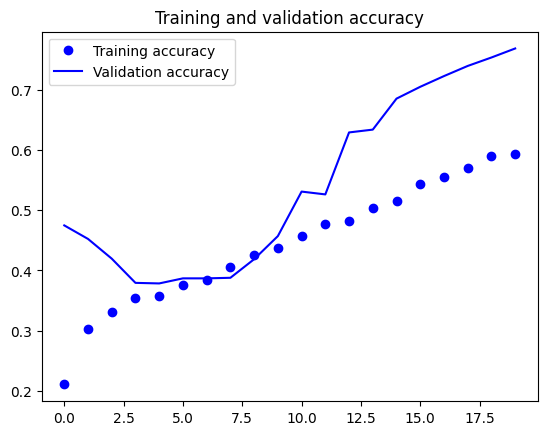

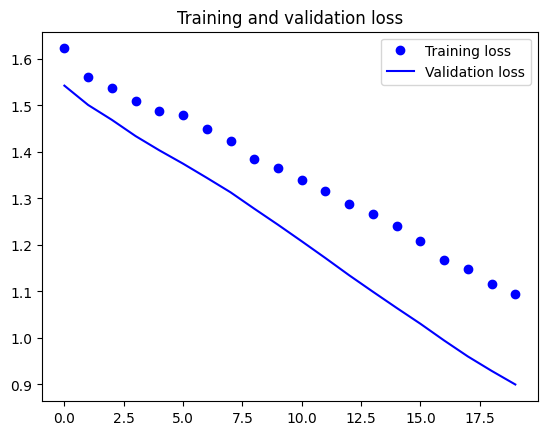

In [34]:
# Verificar tabla de datos 


accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss =flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes2 = flower_model.predict(test_X)

42/42 [==============================] - 0s 3ms/step


In [37]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [38]:
predicted_classes.shape, test_Y.shape

((1337,), (1337,))

Found 993 correct labels


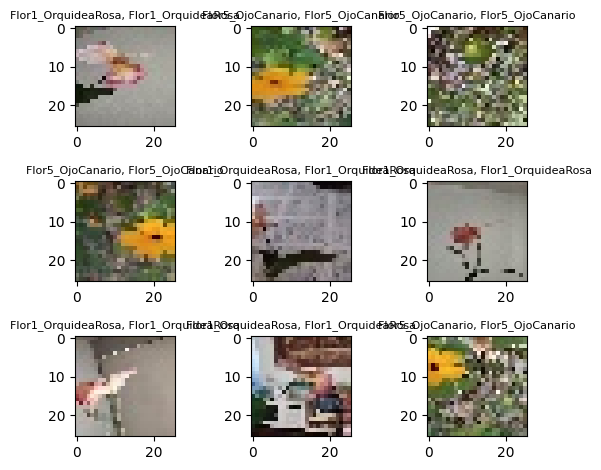

In [44]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none')
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()


Found 344 incorrect labels


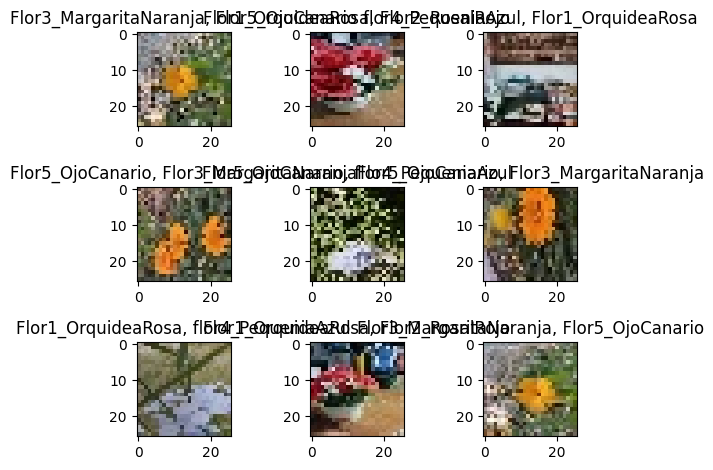

In [42]:
# Etiquetas incorrectas 

incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(26,26,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [43]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.72      0.99      0.83       509
     Class 1       1.00      0.09      0.17       142
     Class 2       0.90      0.47      0.61       174
     Class 3       0.97      0.57      0.72       210
     Class 4       0.67      0.91      0.77       302

    accuracy                           0.74      1337
   macro avg       0.85      0.61      0.62      1337
weighted avg       0.80      0.74      0.70      1337



Found 993 correct labels


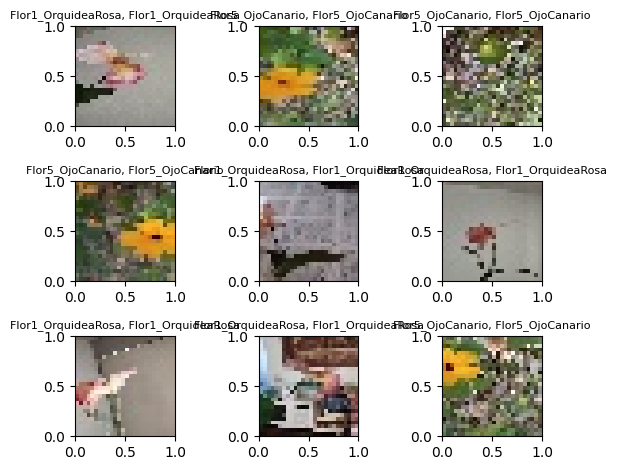

In [45]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    
    # Use extent to control the size of the displayed image
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none', extent=[0, 1, 0, 1])
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()